**Introduccion a Open CV**

Estudiante: Marlon Moncayo

**Leer, Escribir y Mostrar una imagen**

OpenCV provee las funciones imread() y imwrite() que soportan varios formatos de archivos para
trabajar con imagenes, la imagen debe estar en el directorio de trabaja actual o debes pasar la
direccion absoluta o relativa de la ubicacion de la imagen.

**Usando la funcion Imread**

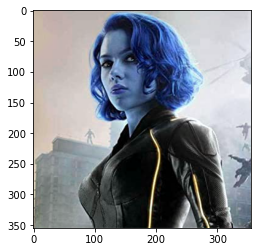

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
# lctura de una imagen
img = cv.imread('Foto.jpg')
# mostrar la imagen
plt.imshow(img)

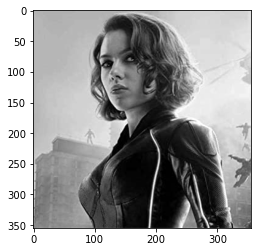

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('Foto.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")

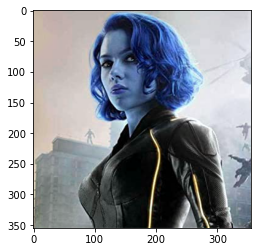

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("Foto.jpg", cv.IMREAD_COLOR)
plt.imshow(img, cmap="gray")

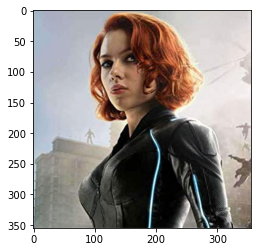

In [8]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

 **Usando la funcion imshow()**

In [ ]:
import cv2 as cv
#leems la imagen
img = cv.imread("Foto.jpg")
cv.imshow("Viuda Negra", img)
# cerramos la imagen
cv.waitKey(0)
cv.destroyAllWindows()

**Usando la funcion imwrite()**

La funcion imwrite nos permite escribir en disco o guardar una imagen, le pasamos como argumento
la ruta donde donde guardar con el nombre a guardar y la extencion, y como segundo argumento
la imagen a guardar si todo sale sin errores devuelve True

In [8]:
import cv2 as cv
img = cv.imread("Foto.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imwrite("scarlett_gray.jpg", img_gray)

True

**Lectura y Esritura de Archivos de Video**

OpenCV dispone de las clases **VideoCapture() y VideoWriter()** que soporta varios formatos de
archivos de video Los formatos admitidos varían según el sistema, pero siempre deben incluir AVI.
A través de su método read (), una clase de VideoCapture puede sondearse para nuevos cuadros
hasta llegar al final de su archivo de video. Cada cuadro es una imagen en formato BGR.

**Reproducir video desde Archivo**

In [7]:
import numpy as np 
import cv2 as cv 

# crear un objeto VideoCapture su parametro sera la direccion del video 
cap = cv.VideoCapture('videoplayback.mp4')
# creamos un bucle

while(cap.isOpened()):
    ret,frame = cap.read()
    if ret:
        
        cv.imshow("Yolo V3", frame)
        
        if(cv.waitKey(10) & 0xFF ==ord('q')):
            break

    else:
        break
cap.release()
cv.destroyAllWindows()

**Acceder a la camara**

In [ ]:
import numpy as np
import cv2 as cv
# crear un objeto VideoCapture su parametro sera la direccion del video
cap = cv.VideoCapture(0)
# creamos un bucle
while(cap.isOpened()):
ret,frame = cap.read()
if ret:
cv.imshow("Camara WEb", frame)
if(cv.waitKey(10) & 0xFF ==ord("a")):
break
else:
break
cap.release()
cv.destroyAllWindows()

**Funciones para Dibujar Geometrias en OpenCV**

**Dibujar una Linea**

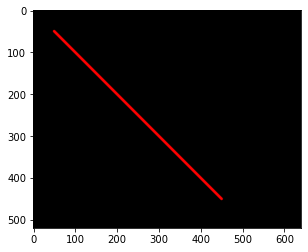

In [4]:
#la funcion cv.line()
#cv.line(img, coordenadas iniciales, color, grosor)
# importammos librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#creamos una imagen
img=np.zeros((520,640,3), np.uint8)
# dibujamos la linea en la imagen
cv.line(img,(50,50),(450,450),(255,0,0),6)
#mostrar nuestra imagen
plt.imshow(img)


Dibujar un Circulo

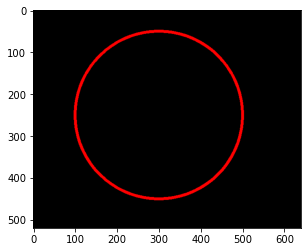

In [2]:
# la funcion cv.ccircle 
# parametros: img, coordenadas centrales, radio, color, grosor
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#creamos una imagen
img=np.zeros((520,640,3), np.uint8)
# dibujamos el circulo 
cv.circle(img,(300,250), 200,(255,0,0),5)
# mostrar nuestra imagen
plt.imshow(img)


Dibujar un Rectangulo

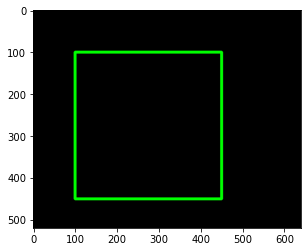

In [3]:
# la funcion cv.rectangle()
# Parametros: img, corrdenada esquina superior izquierda, cordenada esquina inferior derecha
# , color, grosor
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#creamos una imagen
img=np.zeros((520,640,3), np.uint8)
# dibujamos el rectangulo 
cv.rectangle(img,(100,100), (450,450),(0,255,0),5)
# mostrar nuestra imagen
plt.imshow(img)

**CAPTURAR EVENTOS DESDE EL MOUSE**

OpenCV permite que las ventanas con nombre se creen, redibujen y destruyan usando las funciones
namedWindow(), imshow() y destroyWindow(). Además, cualquier ventana puede
capturar la entrada del teclado a través de la función waitKey () y la entrada del mouse a través
de la función setMouseCallback(). Veamos un ejemplo donde mostramos cuadros de entrada
de cámara en vivo


In [1]:
import cv2 as cv
clicked = False
# funcion encargada de capturar el click del mouse
def onMouse(evento,x,y,flags,param):
# variable global
    global clicked
    if(evento ==cv.EVENT_LBUTTONUP):
        clicked = True
# creamos objeto cv.VideoCapture()
camCap = cv.VideoCapture(0)
cv.namedWindow("MyWindow")
# configuramos se envie a la funcion onMouse los eventos del mouse
cv.setMouseCallback("MyWindow",onMouse)
print("Mostrando estado de la Camara, Presione en la Ventana para detener")
ret,frame = camCap.read()
while(ret and cv.waitKey(1)==-1 and not clicked):
    cv.imshow("MyWindow", frame)
    ret,frame = camCap.read()
camCap.release()
cv.destroyAllWindows()

Mostrando estado de la Camara, Presione en la Ventana para detener


El argumento para waitKey () es un número de milisegundos para esperar la entrada del teclado.
El valor de retorno es -1 (lo que significa que no se ha presionado ninguna tecla) o un código de
tecla ASCII, como 27 para Esc. Podemos enumerar todos los eventos del mouse disponibles con el
siguiente codigo:

In [2]:
import cv2 as cv
events = [i for i in dir(cv) if 'EVENT' in i ]
events

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

**Eventos con el Raton**

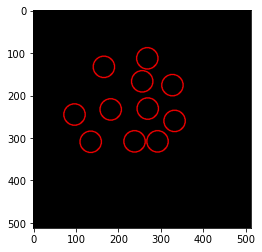

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
def draw_circle(event, x, y, flags, param):
    if(event == cv.EVENT_LBUTTONDBLCLK):
        
        cv.circle(img, (x, y), 25, (255,0,0), 2)
        
img = np.zeros((512,512,3), np.uint8)

cv.namedWindow('Dibujando Circulos')
cv.setMouseCallback('Dibujando Circulos', draw_circle)

while(True):
    cv.imshow('Dibujando Circulos',img)
    if (cv.waitKey(1) & 0xFF ==ord('q')):
        break
    
cv.destroyAllWindows()
plt.imshow(img)


**Tarea 1: Eventos del Mouse**

Realizar un ejercicio capturando eventos con el mouse donde se pulse el Botón izquierdo dibuje un circulo, pulsamos el botón derecho dibuja un rectángulo


Presione la tecla a para salir


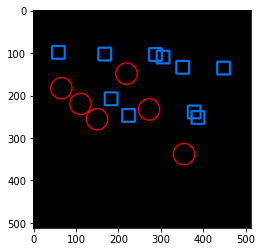

In [87]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
print("Presione la tecla a para salir")
def draw_figures(event, x, y, flags, param):
    if(event == cv.EVENT_LBUTTONDBLCLK):
        cv.circle(img, (x, y), 25, (255,0,0), 2)
        
    elif(event == cv.EVENT_RBUTTONDBLCLK):
        cv.rectangle(img,(x,y), (x+30,y+30),(0,120,250),3)
        
img = np.zeros((512,512,3), np.uint8)

cv.namedWindow("Dibujando Figuras")
cv.setMouseCallback("Dibujando Figuras", draw_figures)

while(True):
    cv.imshow("Dibujando Figuras",img)
    
    
    if (cv.waitKey(1) & 0xFF ==ord('a')):
        break
    
cv.destroyAllWindows()
plt.imshow(img)

**CLASE 3**

**Operaciones Basicas con Imagenes**

La mayoria de operaciones con imagenes estan relacionadas principalmente con la liberia numpy
en lugar de OpenCV. Se requiere de conocimientos basicos en su uso para poder entender y aplicar
de mejor manera las operaciones.

**Acceso y Modificacion de Pixeles**

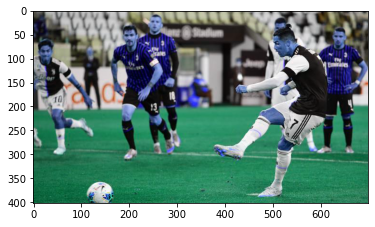

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('Futbol.jpeg')
plt.imshow(img)

In [4]:
#Accecdemos
px=img[100,100]
px

array([52, 49, 34], dtype=uint8)

In [83]:
#Accecdemos al valor de un pixel en un solo canal
px=img[100,100,0]
px

0

In [84]:
#Accecdemos al valor de un pixel en un solo canal
px=img[100,100,1]
px

120

In [85]:
#Accecdemos al valor de un pixel en un solo canal
px=img[100,100,2]
px

250

Modificacion

In [86]:
# Modificando el valor de pixeles
img[100,100]=[255,255,255]
img[100,100]

array([255, 255, 255], dtype=uint8)

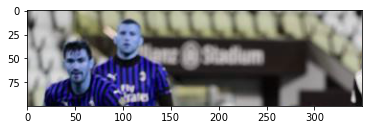

In [6]:
img2=img[:100, 150:500]
plt.imshow(img2)

**Metodos item[] y itemset[]**

Para el acceso individual de píxeles, los métodos de Numpy, array.
item () y array.itemset () se consideran mejores. Sin embargo, siempre devuelven un escalar,
por lo que si desea acceder a todos los valores B, G, R, deberá llamar a array.item () por separado
para cada valor.

In [8]:
#Accediendo
img.item(50,50,2)

16

In [10]:
#Modificando
img.itemset((50,50,2),100)
img.item(50,50,2)

100

**Accediendo a las Propiedades de la Imagen**

Las Imagenes poseen propiedades como numero de filas, numero de columnas, numero de pixeles,
typo de dato

In [11]:
img.shape

(402, 700, 3)

Metodo dtype

In [12]:
img.dtype

dtype('uint8')

In [11]:
type(img)

numpy.ndarray

In [13]:
img.size

844200

**ROI de una imagen**

A veces, tendrás que jugar con ciertas regiones de imágenes. Para la detección de ojos en imágenes,
la detección de la primera cara se realiza sobre toda la imagen. Cuando se obtiene una cara,
seleccionamos solo la región de la cara y buscamos ojos dentro de ella en lugar de buscar en toda la
imagen. Mejora la precisión (porque los ojos siempre están en las caras) y el rendimiento (porque
buscamos en un área pequeña) El ROI lo podemos obtener utilizando la indexacion antes vista, en
este ejemplo seleccionaremos la pelota y la copiaremos en otro lugar de la imagen:

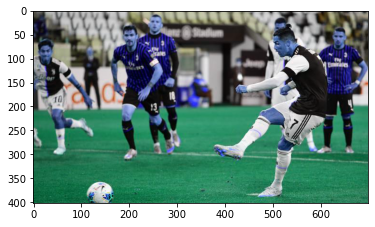

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('Futbol.jpeg')
plt.imshow(img)

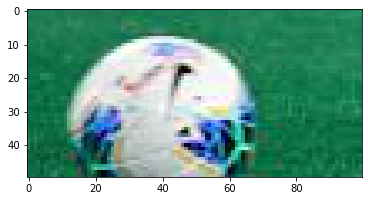

In [13]:
#
pelota =img[350:400,100:200]
plt.imshow(pelota)

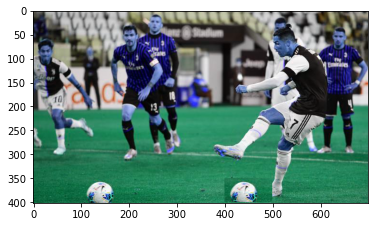

In [14]:
img[350:400,400:500]=pelota
plt.imshow(img)

**Division y Fusion de canales**

A veces necesitará trabajar por separado en los canales B, G, R de una imagen. En este caso, debe
dividir la imagen BGR en canales individuales. En otros casos, es posible que deba unirse a estos
canales individuales para crear una imagen BGR

In [15]:
# split
b,g,r=cv.split(img)


Text(0.5, 1.0, 'Blue Channel')

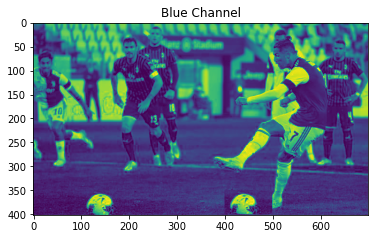

In [16]:
plt.imshow(b)
plt.title("Blue Channel")

Text(0.5, 1.0, 'Green Channel')

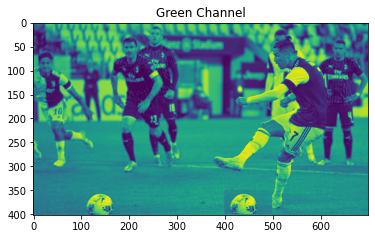

In [17]:
plt.imshow(g)
plt.title("Green Channel")

Text(0.5, 1.0, 'Red Channel')

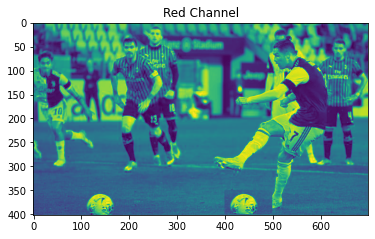

In [18]:
plt.imshow(r)
plt.title("Red Channel")

**Funcion merge()**

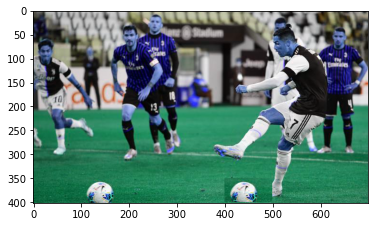

In [19]:
# merged permite unir los canales de una imagen
img_unida=cv.merge((b,g,r))
plt.imshow(img_unida)

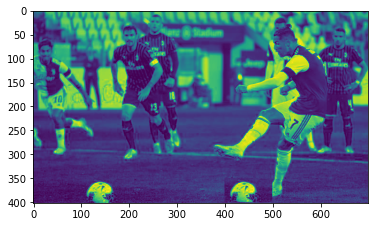

In [20]:
channel_blue = img[:,:,0]
plt.imshow(channel_blue)

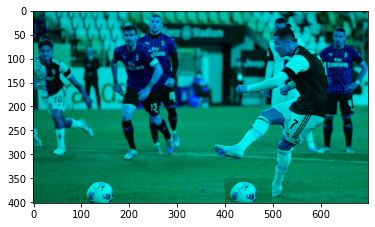

In [21]:
img[:,:,0]=0
plt.imshow(img)

**Operaciones Aritmeticas con Imagenes**

**Mescla de Imagenes**

Esto también es una adición de imagen, pero se otorgan diferentes pesos a las imágenes para dar
una sensación de fusión o transparencia. Aquí tomé dos imágenes para mezclarlas. La primera
imagen tiene un peso de 0.7 y la segunda imagen tiene 0.3.

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1=cv.imread('Ejemplo1.jpg')
img2=cv.imread('ejemplo2.jpg')

# cambio de espacio de color
img1=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img2=cv.cvtColor(img2,cv.COLOR_BGR2RGB)

# igualar el tamaño
fil,cols,chan = img1.shape
img2 = cv.resize(img2,(cols,fil))


Text(0.5, 1.0, 'Llama')

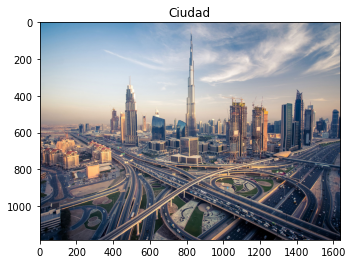

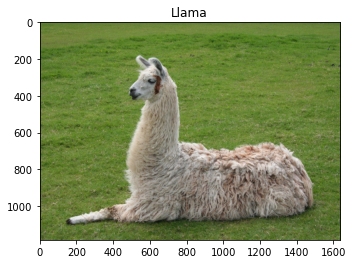

In [24]:
# Mostramos las imagenes
plt.figure(1)
plt.imshow(img1)
plt.title("Ciudad")

plt.figure(2)
plt.imshow(img2)
plt.title("Llama")


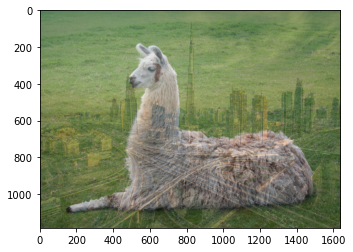

In [25]:
#combina
img_out=cv.addWeighted(img1,0.3,img2,0.7,0)
plt.imshow(img_out)

**Operaciones bit a bit**

Esto incluye las operaciones bit a bit AND, OR, NOT y XOR. Serán muy útiles al extraer cualquier
parte de la imagen (como iremos viendo al transcurso de este aprendisaje), definir y trabajar
con ROI no rectangulares, etc. A continuación veremos un ejemplo de cómo cambiar una región
particular de una imagen.
Quiero poner el logotipo de OpenCV sobre una imagen. Si agrego dos imágenes, cambiará el color.
Si los mezclo, obtengo un efecto transparente. Pero quiero que sea opaco. Si fuera una región
rectangular, podría usar el ROI como lo hicimos en el último capítulo. Pero el logotipo de OpenCV
no es una forma rectangular.

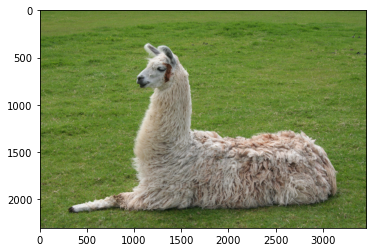

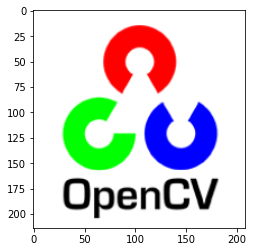

In [75]:
#importamos las librerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# cargar nuestras imagenes
img1 = cv.imread('ejemplo2.jpg')
img2 = cv.imread('imagen.png')
# cambiando espacio de color
llama = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
cv2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# mostrado las imagenes leidas
plt.figure(1)
plt.imshow(llama)
plt.figure(2)
plt.imshow(cv2)

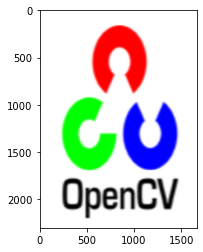

In [90]:
#cambiamos el tamano de imagen
fil,col,_ = llama.shape
fil2,col2,_= cv2.shape
cv2=cv.resize(cv2,(col2//2,fil))
plt.imshow(cv2)

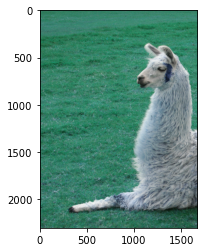

In [91]:
fil, col,_=cv2.shape
roi=img1[0:fil,0:col]
plt.imshow(roi)

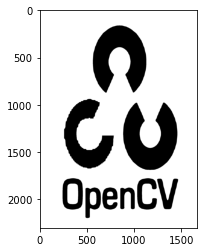

In [92]:
# creamos una mascara de logotipo
cv2_gray = cv.cvtColor(cv2,cv.COLOR_RGB2GRAY)
ret,mask = cv.threshold(cv2_gray, 150,255, cv.THRESH_BINARY)
plt.imshow(mask, cmap="gray")

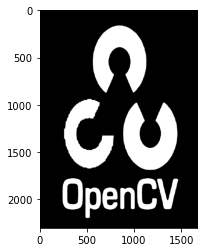

In [93]:
# creamos una mascara invertida
mask_inv=cv.bitwise_not(mask)
plt.imshow(mask_inv, cmap="gray")

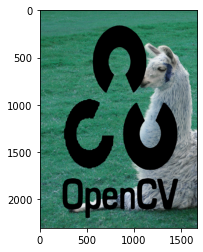

In [94]:
# tomamos el roi menos la mascara
img1_bg =cv.bitwise_and(roi,roi,mask=mask)
plt.imshow(img1_bg)

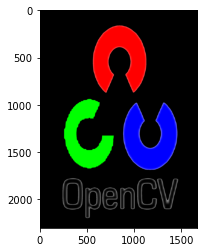

In [95]:
#tomamos region de interes del logotipo
img2_bg = cv.bitwise_and(cv2,cv2,mask=mask_inv)
plt.imshow(img2_bg)

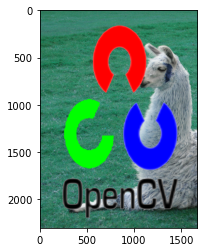

In [96]:
img = img1_bg + img2_bg
plt.imshow(img)

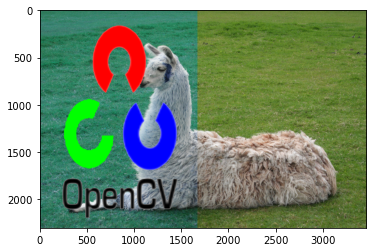

In [97]:
llama[0:fil,0:col]=img
plt.imshow(llama)

**Procesamiento de Imagenes**

**Cambio de Espacio de Color de las Imagenes**

En la visión por computadora y el procesamiento de imágenes, el espacio de color se refiere a una
forma específica de organizar los colores. Un espacio de color es en realidad una combinación de dos
cosas, un modelo de color y una función de mapeo. La razón por la que queremos modelos de color
es porque nos ayuda a representar valores de píxeles usando tuplas. La función de mapeo asigna el
modelo de color al conjunto de todos los colores posibles que se pueden representar. Hay muchos
espacios de color diferentes que son útiles. Algunos de los espacios de color más populares son
RGB, YUV, HSV, Lab, etc. Diferentes espacios de color ofrecen diferentes ventajas. Solo tenemos
que elegir el espacio de color adecuado para el problema dado. Tomemos un par de espacios de
color y veamos qué información proporcionan:
RGB: Probablemente el espacio de color más popular. Es sinónimo de rojo, verde y azul. En este
espacio de color, cada color se representa como una combinación ponderada de rojo, verde y azul.
Por lo tanto, cada valor de píxel se representa como una tupla de tres números correspondientes a
rojo, verde y azul. Cada valor oscila entre 0 y 255.

(<matplotlib.image.AxesImage at 0x1fde4197d88>,
 Text(0.5, 1.0, 'Imagen Original'))

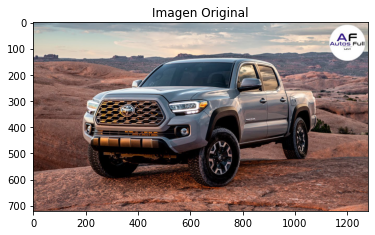

In [99]:
#importamos las ibrerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('auto.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img),plt.title("Imagen Original")

(<matplotlib.image.AxesImage at 0x1fde592b648>, Text(0.5, 1.0, 'R'))

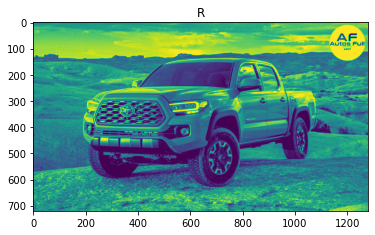

In [100]:
plt.imshow(img[:,:,0]),plt.title("R")

(<matplotlib.image.AxesImage at 0x1fde599a3c8>, Text(0.5, 1.0, 'G'))

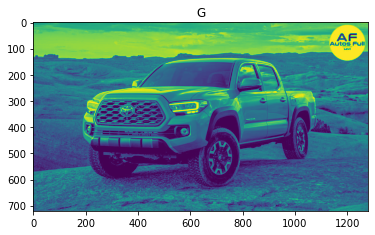

In [101]:
plt.imshow(img[:,:,1]),plt.title("G")

(<matplotlib.image.AxesImage at 0x1fde9149308>, Text(0.5, 1.0, 'B'))

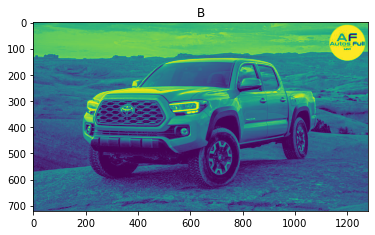

In [102]:
plt.imshow(img[:,:,2]),plt.title("B")

**Nota:**
    
Los objetos no poseen color, los colores que adquieren los objetos dependen de la luz inducida en el material del mismo y la reflexion que se genera.

**YUV:**
Aunque RGB es bueno para muchos propósitos, tiende a ser muy limitado para muchas
aplicaciones de la vida real. La gente comenzó a pensar en diferentes métodos para separar la
información de intensidad, de la información de color. Por lo tanto, se les ocurrió el espacio de
color YUV. Y se refiere a la luminancia o intensidad, y los canales U / V representan información
de color. Esto funciona bien en muchas aplicaciones porque el sistema visual humano percibe la
información de intensidad de manera muy diferente a la información de color.

(<matplotlib.image.AxesImage at 0x1fddcaef508>,
 Text(0.5, 1.0, 'Imagen Original'))

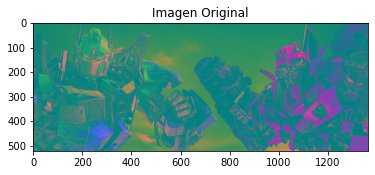

In [103]:
#importamos las ibrerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('trans.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2YUV)
plt.imshow(img),plt.title("Imagen Original")

(<matplotlib.image.AxesImage at 0x206913cb208>, Text(0.5, 1.0, 'Luminosidad'))

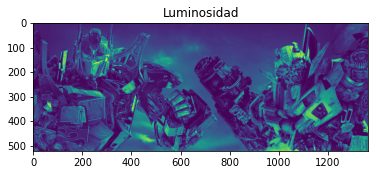

In [71]:
plt.imshow(img[:,:,0]),plt.title("Luminosidad")

(<matplotlib.image.AxesImage at 0x1fde9181e88>, Text(0.5, 1.0, 'U'))

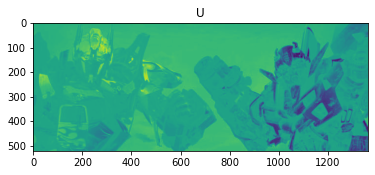

In [104]:
plt.imshow(img[:,:,1]),plt.title("U")

(<matplotlib.image.AxesImage at 0x1fdee7a7488>, Text(0.5, 1.0, 'V'))

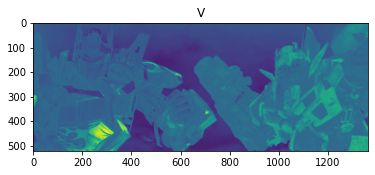

In [105]:
plt.imshow(img[:,:,2]),plt.title("V")

**HSV:**

Al final resultó que, incluso YUV todavía no era lo suficientemente bueno para algunos
aplicaciones. Entonces la gente comenzó a pensar en cómo los humanos perciben el color, y se les
ocurrió el espacio de color HSV. HSV significa Hue, Saturación y Valor(Matiz, Saturacion, Valor).
Este es un sistema cilíndrico donde separamos tres de las propiedades más primarias de los colores
y las representamos usando diferentes canales. Esto está estrechamente relacionado con la forma
en que el sistema visual humano comprende el color. Esto nos da mucha flexibilidad en cuanto a
cómo podemos manejar las imágenes.

(<matplotlib.image.AxesImage at 0x1fde570b9c8>,
 Text(0.5, 1.0, 'Imagen Original'))

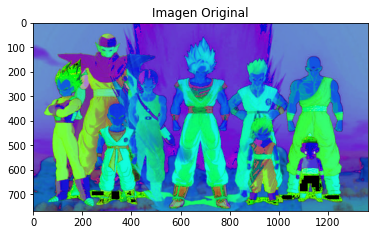

In [107]:
#importamos las ibrerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('dragon.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
plt.imshow(img),plt.title("Imagen Original")

(<matplotlib.image.AxesImage at 0x1fde57ec848>, Text(0.5, 1.0, 'Canal H'))

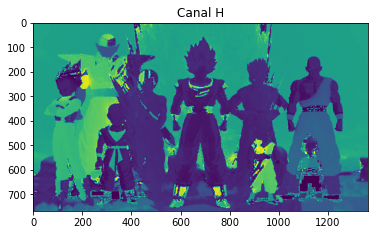

In [109]:
plt.imshow(img[:,:,0]),plt.title("Canal H")

(<matplotlib.image.AxesImage at 0x20690e9c1c8>, Text(0.5, 1.0, 'A'))

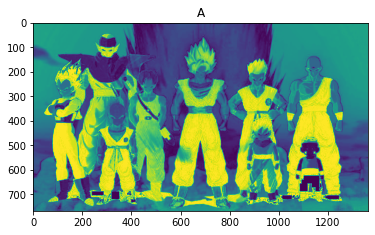

In [78]:
plt.imshow(img[:,:,1]),plt.title("Canal S")

(<matplotlib.image.AxesImage at 0x1fde5859b08>, Text(0.5, 1.0, 'Canal V'))

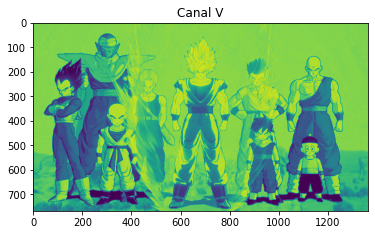

In [110]:
plt.imshow(img[:,:,2]),plt.title("Canal V")

**Tarea 2:**
    
Realizar 3 ejercicios:


1: Fusión de imágenes con cv.addWeighted()

Text(0.5, 1.0, 'Ciudad')

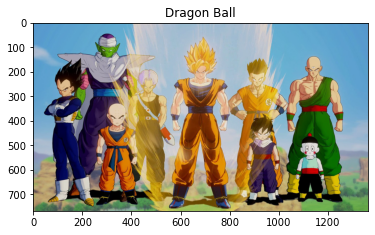

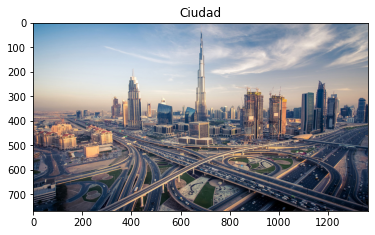

In [137]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread("dragon.jpeg")
img2 = cv.imread("Ejemplo1.jpg")
# cambio de espacio de color
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# igualar el tamano
fil,cols,chan = img1.shape
img2 = cv.resize(img2,(cols,fil))
#Mostramos las imagenes
plt.figure(1)
plt.imshow(img1)
plt.title("Dragon Ball")
plt.figure(2)
plt.imshow(img2)
plt.title("Ciudad")

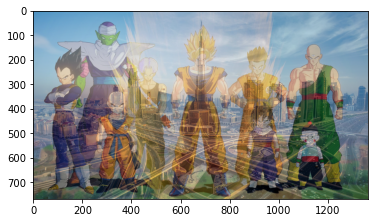

In [140]:
#combinar imagenes
imag_out = cv.addWeighted(img1,0.5,img2,0.5,0)
plt.imshow(imag_out)

2: Extracción del ROI (porción de una imagen) y ubicarla en otro lugar de la misma

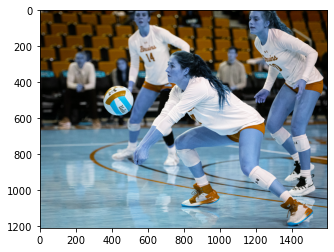

In [112]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread("voley.jpg")
plt.imshow(img)

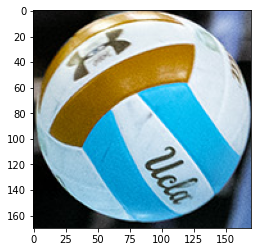

In [130]:
balon=img[420:590,350:520]
plt.imshow(balon)

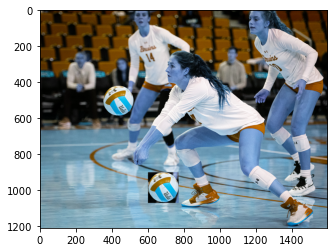

In [135]:
img[900:1070,600:770]=balon
plt.imshow(img)

3: Ejercicio con operaciones Bit a Bit como el visto en clase

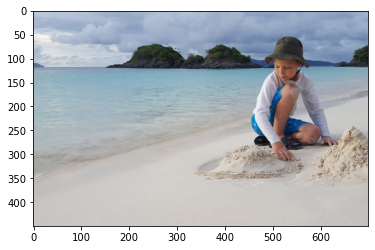

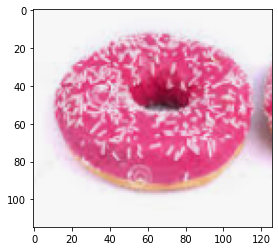

In [5]:
#immportamos las librerias
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
# cargar nuestras imagenes
img1 = cv.imread('playa.jpg')
img2 = cv.imread('donas.png')
# cambiando espacio de color
playa = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
dona = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# mostrado las imagenes leidas
plt.figure(1)
plt.imshow(playa)
plt.figure(2)
plt.imshow(dona)

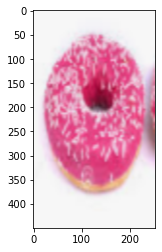

In [10]:
# cambiamos el tamano de imagen
fil,col,_ = playa.shape
fil2,col2,_=dona.shape
dona=cv.resize(dona,(col2//2,fil))
plt.imshow(dona)

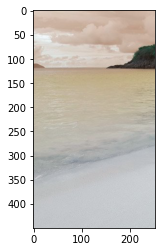

In [11]:
fil,col,_=dona.shape
roi=img1[0:fil,0:col]
plt.imshow(roi)

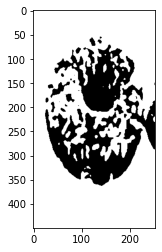

In [12]:
dona_gray = cv.cvtColor(dona, cv.COLOR_RGB2GRAY)
ret,mask = cv.threshold(dona_gray, 150,255, cv.THRESH_BINARY)
plt.imshow(mask, cmap="gray")

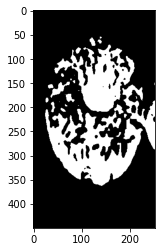

In [13]:
# Creamos una mascara invertida
mask_inv = cv.bitwise_not(mask)
plt.imshow(mask_inv, cmap="gray")

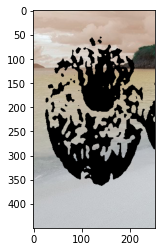

In [14]:
# tomamos el roi menos la mascara
img1_bg = cv.bitwise_and(roi,roi,mask = mask)
plt.imshow(img1_bg)

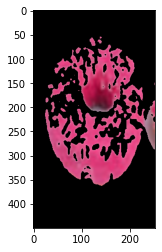

In [16]:
#tomamos region de intere del logotipo opencv
img2_bg = cv.bitwise_and(dona,dona,mask=mask_inv)
plt.imshow(img2_bg)

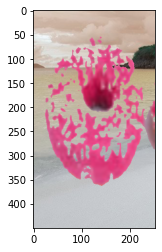

In [17]:
img = img1_bg + img2_bg
plt.imshow(img)

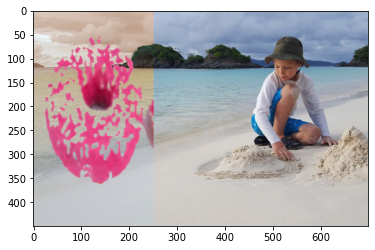

In [18]:
playa[0:fil,0:col]=img
plt.imshow(playa)

**Clase 4**

**Deteccion de Colores**

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

cap=cv.VideoCapture(0)

# hsv azul 
azul_bajo=np.array([90,100,50],np.uint8)
azul_alto=np.array([125,255,255],np.uint8)

while cap.isOpened():
    ret, frame=cap.read()
    if ret:
        
        img_hsv=cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        mask=cv.inRange(img_hsv,azul_bajo,azul_alto)
        res =cv.bitwise_and(frame,frame, mask=mask)
        cv.imshow("ORIGINAL",frame)
        cv.imshow("Mascara", mask)
        cv.imshow("Resulatdo", res)
        
        if cv.waitKey(10) & 0xFF==ord('q'):
            break
    else:
        break
cap.release()
destroyAllWindows()
        


**Transformaciones Geometricas con Imagenes**

 Escalado

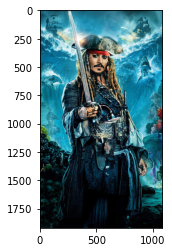

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('pirata.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

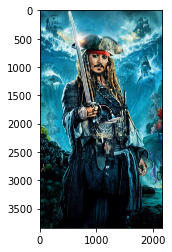

In [6]:
#escalado
img_escal=cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)
plt.imshow(img_escal)

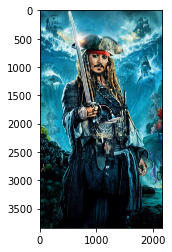

In [8]:
h, w,_ = img.shape
result = cv.resize(img,(w*2,h*2), interpolation=cv.INTER_CUBIC)
plt.imshow(result)

### Rotacion

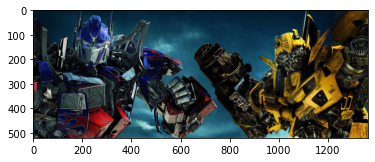

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('trans.jpeg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

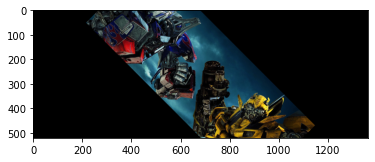

In [16]:
# girar la imagen
fil,col,_=img.shape
m = cv.getRotationMatrix2D(((col-1)/2.0,(fil-1)/2.0),-45,0.7)
#transformacion de la imagen
result = cv.warpAffine(img, m, (col,fil))
plt.imshow(result)

In [30]:
### Traslacion de una imagen

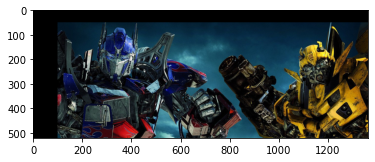

In [36]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('trans.jpeg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
fil,col,_=img.shape
M =np.float32([[1,0,100],[0,1,50]])
result = cv.warpAffine(img, M,(col,fil))
plt.imshow(result)

In [ ]:
### Transformacion Afine

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'Salida'))

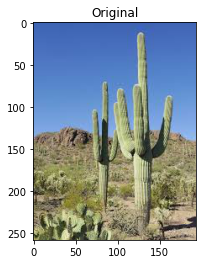

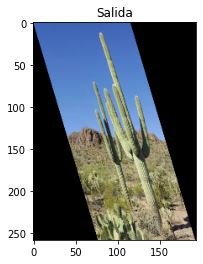

In [45]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img =cv.imread('cactus.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(img),plt.title("Original")

plt.figure(1)
plt.imshow(img),plt.title("Original")

fil,col,_=img.shape

# puntos de entrada
scr_points = np.float32([[0,0],[col-1,0],[0,fil-1]])
#puntos de salida
dts_points=np.float32([[0,0],[int(0.6*(col-1)),0],[int(0.4*(col-1)),fil-1]])

# matriz de transformacion Afin
matriz_Afin = cv.getAffineTransform(scr_points,dts_points)

#Transformacion
output = cv.warpAffine(img,matriz_Afin,(col,fil))

#salida

plt.figure(2), plt.imshow(output), plt.title("Salida")


#### Espejo de una imagen

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'Salida'))

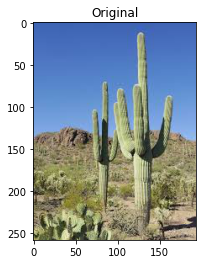

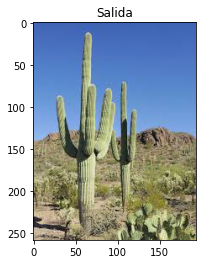

In [46]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img =cv.imread('cactus.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(img),plt.title("Original")

plt.figure(1)
plt.imshow(img),plt.title("Original")

fil,col,_=img.shape

# puntos de entrada
scr_points = np.float32([[0,0],[col-1,0],[0,fil-1]])
#puntos de salida
dts_points=np.float32([[col-1,0],[0,0],[col-1, fil-1]])
# matriz de transformacion Afin
matriz_Afin = cv.getAffineTransform(scr_points,dts_points)

#Transformacion
output = cv.warpAffine(img,matriz_Afin,(col,fil))

#salida

plt.figure(2), plt.imshow(output), plt.title("Salida")


#### Transformaciones de Perspectiva

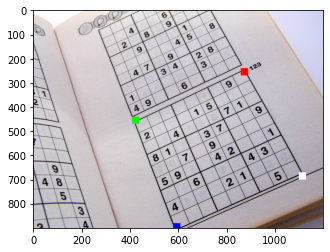

In [54]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img=cv.imread('sudoku.jpg')
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

# arriba izquierda verde
img[440:470,410:440]=[0,255,0]

# arriba derecha rojo
img[240:270,860:890]=[255,0,0]

# abajo izquierda azul
img[880:910,580:610]=[0,0,255]

# abajo derecha blanco
img[670:700,1100:1130]=[255,255,255]

plt.imshow(img)


(<matplotlib.image.AxesImage at 0x2054a072788>, Text(0.5, 1.0, 'OUTPUT'))

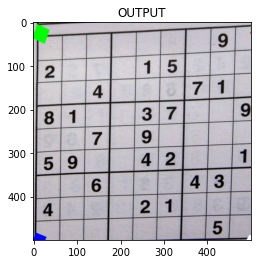

In [62]:
pts1 = np.float32([[400,440],[580,900],[850,250],[1110,680]])
pts2 = np.float32([[0,0],[0,500-1],[500-1,0],[500-1,500-1]])

matriz = cv.getPerspectiveTransform(pts1,pts2)
output = cv.warpPerspective(img, matriz,(500,500))
plt.imshow(output),plt.title("OUTPUT")

## Umbralizacion de Imagenes

### Umbralizacion Simple

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x23da05df9c8>)

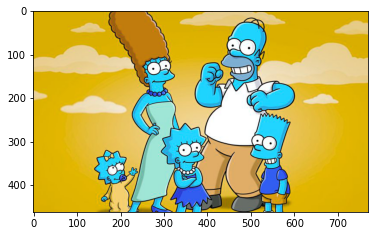

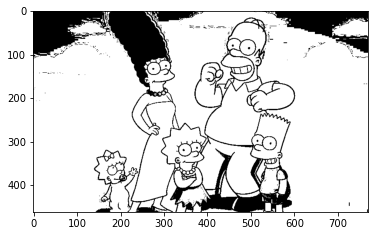

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('simsonp.jpg')
img2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,th1 = cv.threshold(img2,127,255,cv.THRESH_BINARY)
plt.figure(1),plt.imshow(img)
plt.figure(2),plt.imshow(th1, cmap="gray")

# Tarea 3:

## Ejercicios de Transformacion Geometricas de Imagenes

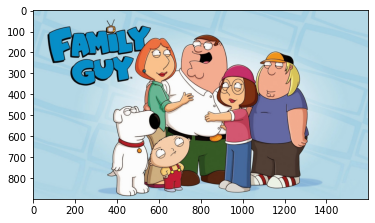

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('familia.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)

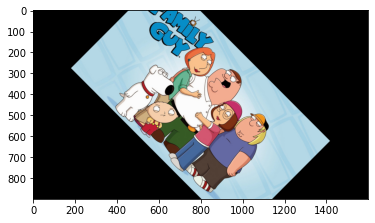

In [12]:
# girar la imagen
fil,col,_=img.shape
m = cv.getRotationMatrix2D(((col-1)/2.0,(fil-1)/2.0),-45,0.7)
#transformacion de la imagen
result = cv.warpAffine(img, m, (col,fil))
plt.imshow(result)

## Espejo de una Imagen

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'Salida'))

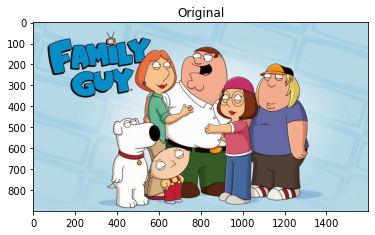

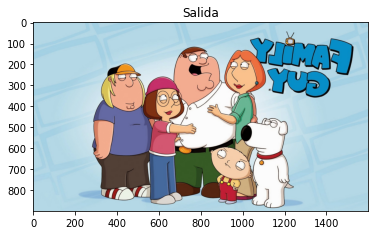

In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img =cv.imread('familia.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(img),plt.title("Original")

plt.figure(1)
plt.imshow(img),plt.title("Original")

fil,col,_=img.shape

# puntos de entrada
scr_points = np.float32([[0,0],[col-1,0],[0,fil-1]])
#puntos de salida
dts_points=np.float32([[col-1,0],[0,0],[col-1, fil-1]])
# matriz de transformacion Afin
matriz_Afin = cv.getAffineTransform(scr_points,dts_points)

#Transformacion
output = cv.warpAffine(img,matriz_Afin,(col,fil))

#salida

plt.figure(2), plt.imshow(output), plt.title("Salida")


### Umbralizacion de imagenes

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x23da04aec48>)

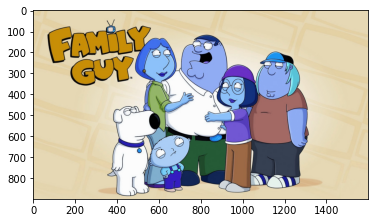

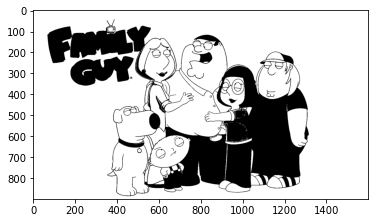

In [15]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('familia.jpg')
img2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,th1 = cv.threshold(img2,127,255,cv.THRESH_BINARY)
plt.figure(1),plt.imshow(img)
plt.figure(2),plt.imshow(th1, cmap="gray")